In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib, os

from lib import path_tools as pt
from lib import import_data
import pandas as pd

In [2]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "uvvis"

In [3]:
importlib.reload(import_data)

<module 'lib.import_data' from '/home/tomas/Documents/sciencetools_py/lib/import_data.py'>

In [6]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot

# ETB-046 Variables
samples_dir_etb046 = "190904 ETB-046 MAPbI on glass FF/"
uv_data_dict_etb046 = import_data.init(flag, samples_dir_etb046)
cypher_etb046 = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "5min",
    "20min",
)

print(uv_data_dict_etb046.keys())


Sample data already in local memory, do you wish to wipe and pull from the master Box directory? y/n
y
dict_keys(['20min', '30sec', '3min', '2min', '5min', '1min'])


In [7]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot

# ETB-047 Variables
samples_dir_etb047 = "190902 ETB-047 MAPbI on glass FF/"
uv_data_dict_etb047 = import_data.init(flag, samples_dir_etb047)
cypher_etb047 = (
    "10min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)
print(uv_data_dict_etb047.keys())

Creating new local data folder.
dict_keys(['80min', '120min', '10min', '100min', '60min', '40min'])


In [8]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot

# ETB-048 Variables
samples_dir_etb048 = "190904 ETB-048 MAPbI on glass FF/"
uv_data_dict_etb048 = import_data.init(flag, samples_dir_etb048)
cypher_etb048 = (
    "4min",
    "15min",
)

print(uv_data_dict_etb048.keys())

Creating new local data folder.
dict_keys(['15min', '4min'])


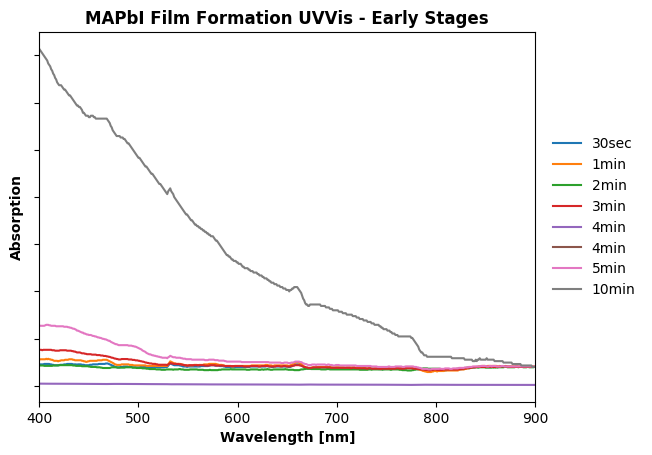

In [23]:
fig = plt.figure(1)
fig_ax = plt.gca()

master_cypher = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "4min",
    "5min",
    "10min",
)

for key in master_cypher:
    if key in uv_data_dict_etb046.keys():
        plt.figure(1)
        plt.plot(uv_data_dict_etb046[key]["wavelength"], uv_data_dict_etb046[key]["abs"]/
                 uv_data_dict_etb046[key]["abs"][500],
                 label=key)
    elif key in uv_data_dict_etb047.keys():
        plt.figure(1)
        plt.plot(uv_data_dict_etb047[key]["wavelength"], uv_data_dict_etb047[key]["abs"]/
                 uv_data_dict_etb047[key]["abs"][500],
                 label=key)
    elif key in uv_data_dict_etb048.keys():
        plt.figure(1)
        plt.plot(uv_data_dict_etb048[key]["wavelength"], uv_data_dict_etb048[key]["abs"],
                 uv_data_dict_etb048[key]["abs"][500],
                 label=key)
        
plt.style.use('default')

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Absorption", weight="semibold")
fig_ax.set_yticklabels([])
plt.xlim(min(uv_data_dict_etb046["1min"]["wavelength"]), max(uv_data_dict_etb046["1min"]["wavelength"]))

plt.title("MAPbI Film Formation UVVis - Early Stages",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)

In [24]:
fig.savefig("abs_norm.png", dpi=200, format='png', bbox_inches='tight')